In [1]:
import os
import matplotlib.pyplot as plt
root = ''
chapter_id = 'MNIST'
images_path= os.path.join(root,'images',chapter_id,)
os.makedirs(images_path,exist_ok=True)
def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=True):
    path = os.path.join(images_path,fig_id+'.'+fig_extension)
    print('save figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)
        

In [2]:
# load data MNIST
import tensorflow as tf
import keras

fashion_MNIST = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_MNIST.load_data()

In [3]:
import numpy as np
import pandas as pd
# cek verion
tf.__version__

'2.9.1'

In [4]:
keras.__version__

'2.9.0'

look a range data sets from x_train

In [5]:
X_train_full.shape # 3 dimensi

(60000, 28, 28)

60.000 grayscale images dengan 28 x 28 pixels

1 pixel intensity merepresentasikan sebagai byte (0 to 255)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = (X_train_full[:5000] / 255.) , (X_train_full[5000:] / 255.)
y_valid, y_train = (y_train_full[:5000]), (y_train_full[5000:])
X_test = X_test / 255.

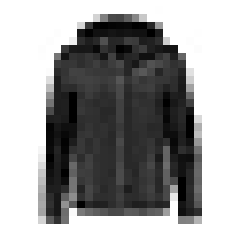

In [10]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

The validation set contains 5,000 images, and the test set contains 10,000 images:

save figure fashion_mnist_plot


C:\Users\User\AppData\Local\Temp\ipykernel_2168\1197260370.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


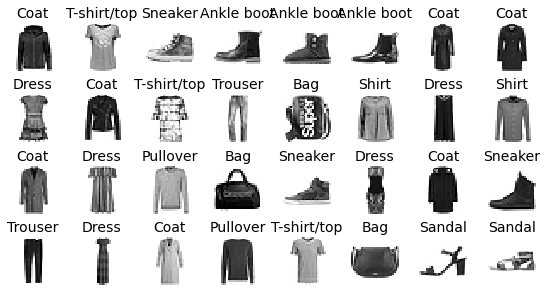

In [15]:
# data ditampilkan dengan 4 baris 8 kolom
n_rows = 4
n_columns= 8

plt.figure(figsize=(n_columns * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_columns):
        index = n_columns * row + col
        plt.subplot(n_rows,n_columns, index + 1) # ngeplot secara iterasi
        plt.imshow(X_train[index], cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=14)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
save_fig('fashion_mnist_plot',tight_layout=False)
plt.show()
    

In [16]:
# create model sequential
model = keras.Sequential()
# convert input data to 1 D data by the shape
model.add(keras.layers.Flatten(input_shape=[28,28]))
# make dense layer/ hidden layer
# Relu => 0 - ~ compturasi value isnt negatif, negatif = nol.
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
# softmax -> range value 0 and 1
model.add(keras.layers.Dense(10, activation ='softmax'))

keras.backend.clear_session()

In [17]:
# membuat dengan models
model2  = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation ='relu'),
        keras.layers.Dense(10, activation='softmax')                
    ]
)
model2.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


params di dapat dari hasil kali dari input dengan weight

In [20]:
model2.layers


In [21]:
hidden1=model2.layers[1]
hidden1.name

'dense'

In [22]:
weights,biases = hidden1.get_weights()
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

In [28]:
keras.utils.plot_model(model2,'my_fashion_mnist.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
